In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Loading dan Review Data

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.shape

(150, 6)

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.isnull().values.any()

False

In [10]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

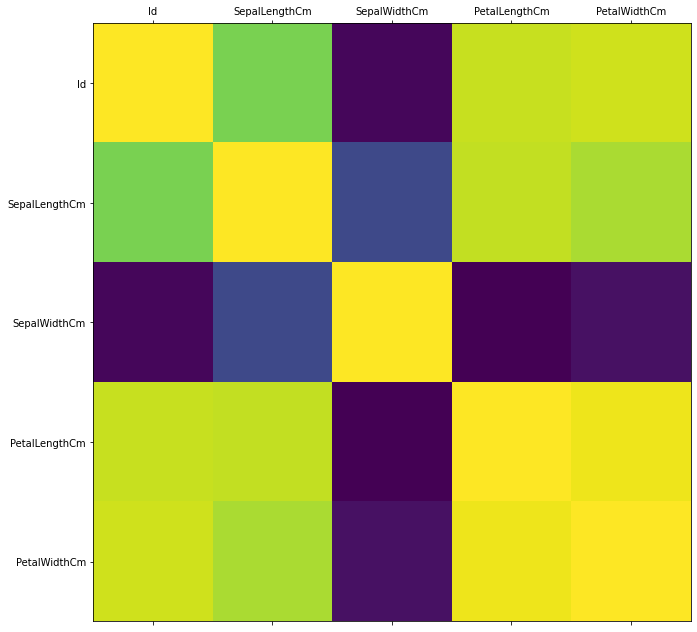

In [11]:
plot_corr(df)

In [12]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## 2. Merapihkan, Membersihkan & Menyiapkan Data

In [18]:
df['Species'].sum()

'Iris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-setosaIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolorIris-versicolo

In [19]:
iris_map = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica':3}
df['Species'] = df['Species'].map(iris_map)

In [20]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [21]:
df.isnull().values.any()

False

In [22]:
num_iris = len(df)
num_s1 = len(df.loc[df['Species']==1])
num_s2 = len(df.loc[df['Species']==2])
num_s3 = len(df.loc[df['Species']==3])
print('Jumlah Species Iris 1 : {0} ({1:2.2f}%)'.format(num_s1, (num_s1/num_iris)*100))
print('Jumlah Species Iris 2 : {0} ({1:2.2f}%)'.format(num_s2, (num_s2/num_iris)*100))
print('Jumlah Species Iris 3 : {0} ({1:2.2f}%)'.format(num_s3, (num_s3/num_iris)*100))

Jumlah Species Iris 1 : 50 (33.33%)
Jumlah Species Iris 2 : 50 (33.33%)
Jumlah Species Iris 3 : 50 (33.33%)


## 3. Memilih Algoritma ML
algoritma Naive Bayes

## 4. Proses Training

In [50]:
from sklearn.model_selection import train_test_split
feature_col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
predicted_class_name = ['Species']

X = df[feature_col_names].values
y = df[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size,random_state=42)

In [58]:
print('{0:0.2f}% ada pada training set'.format((len(X_train)/len(df.index))*100))
print('{0:0.2f}% ada pada test set'.format((len(X_test)/len(df.index))*100))

70.00% ada pada training set
30.00% ada pada test set


In [59]:
print("# rows in dataframe {0}".format(len(df)))

# rows in dataframe 150


In [60]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

## 5. Uji Akurasi, evaluasi model

In [61]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print('acuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))

acuracy: 0.9429


In [62]:
nb_predict_test = nb_model.predict(X_test)

print('nb_predict_test', nb_predict_test)
print('y_test', y_test)
print('acuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 3 3 2 2 3 1 3 1 3 3 3 3 3 1 1 1 1 2 1 1 3 2
 1 1 1 3 2 2 1 1]
y_test [[2]
 [1]
 [3]
 [2]
 [2]
 [1]
 [2]
 [3]
 [2]
 [2]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [3]
 [2]
 [2]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [3]
 [2]
 [1]
 [1]
 [1]
 [3]
 [2]
 [2]
 [1]
 [1]]
acuracy: 0.9778


In [65]:
print('confusion matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test)))
print(" ")
print('classification report')
print(metrics.classification_report(y_test, nb_predict_test))

confusion matrix
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
 
classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.92      0.96        13
           3       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## 6. Peningkatan performa

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=10)
rf.fit(X_train, y_train)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
rf_predict_train = rf.predict(X_train)

from sklearn import metrics
print('acuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, rf_predict_train)))

acuracy: 1.0000


In [68]:
rf_predict_test = rf.predict(X_test)

print('rf_predict_test', rf_predict_test)
print('y_test', y_test)
print('acuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, rf_predict_test)))

rf_predict_test [2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 2 3 2 2 3 1 3 1 3 3 3 3 3 1 1 1 1 2 1 1 3 2
 1 1 1 3 2 2 1 1]
y_test [[2]
 [1]
 [3]
 [2]
 [2]
 [1]
 [2]
 [3]
 [2]
 [2]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [3]
 [2]
 [2]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [3]
 [2]
 [1]
 [1]
 [1]
 [3]
 [2]
 [2]
 [1]
 [1]]
acuracy: 1.0000


In [71]:
print('confusion matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, rf_predict_test)))
print(" ")
print('classification report')
print(metrics.classification_report(y_test, rf_predict_test))

confusion matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
 
classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.7,random_state=42,solver='liblinear',max_iter=10000)
lr.fit(X_train, y_train)
lr_predict_test = lr.predict(X_test)

print('confusion matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, lr_predict_test)))
print(" ")
print('classification report')
print(metrics.classification_report(y_test, lr_predict_test))

confusion matrix
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
 
classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.92      0.96        13
           3       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [76]:
from sklearn.linear_model import LogisticRegressionCV

In [79]:
lr_cv = LogisticRegressionCV(n_jobs=-1,random_state=42, Cs=3, cv=10, refit=False, class_weight='balanced',max_iter=500)
lr_cv.fit(X_train, y_train)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=500,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [80]:
lr_cv_predict_test = lr_cv.predict(X_test)

print('confusion matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print(" ")
print('classification report')
print(metrics.classification_report(y_test, lr_cv_predict_test))

confusion matrix
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
 
classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.92      0.96        13
           3       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [81]:
# menyimpan model
from sklearn.externals import joblib
joblib.dump(rf, 'rfiris-trained-model.pkl')

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
c:\users\acer\appdata\local\programs\python\python37\lib\sit

['rfiris-trained-model.pkl']